## ID3 Alogorithm
- choose an attribute from your dataset
- calculate the significance of attribute in siplitting of data
- split data based on the value of the best attribute
- go to step 1

## Entropy
- lower the entropy less uniform the distribution , the purer the node
- entropy = p(A)log(p(A) - p(B)log(p(B))  p:probability

## Information gain
- node with the higher information gain after splitting has the best attribute to make the initial decision
- information gain = (entropy before split) - (waited entropy after split)

In [4]:
import math
pA = 2/8
pB = 6/8

E = -pA*math.log2(pA) - pB*math.log2(pB) 
E

0.8112781244591328

In [5]:
import math
pA = 3/8
pB = 3/8

E = -pA*math.log2(pA) - pB*math.log2(pB) 
E

1.061278124459133

#### Goal of decision tree is to split data into possible nodes to arrive at desicion node using best attribute

### steps for id3 decision tree
1. compute the entropy of root node, and other attribute 
       
       E = -pA*math.log2(pA) - pB*math.log2(pB) 
2. compute the information gain to choose the most significant best attribute to make decision
       
       information gain = (entropy before split) - (waited entropy after split)
3. choose the best  attribute based on IG and make the splits
4. repeat step 1 to 3 till we arrive at the final decision 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = r'C:\Users\Huligesh\Desktop\Internship\Dataset'
file = r'\Social_Network_Ads.csv'
df = pd.read_csv(path + file)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.Purchased.unique()
print('as we have only two classes this is a binary classification')

as we have only two classes this is a binary classification


In [8]:
df.isnull().sum()
print('no missing value present in the data')

no missing value present in the data


In [9]:
# split data into input and output

x = df.iloc[:,:-1] # except purchased others are inputs
y = df.iloc[:,-1:] # purchased column is the target

In [10]:
x_in = x.iloc[:,-2:]
print('''as both the numerical column are having different unit of measure, 
      we will bring them into same scale by standrizing them using standard scalar''')

as both the numerical column are having different unit of measure, 
      we will bring them into same scale by standrizing them using standard scalar


In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_in.iloc[:,:] = ss.fit_transform(x_in)

In [12]:
#split data training and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x_in, y, test_size = 0.20, random_state=0)

In [17]:
# Build classification model

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)

# default distance measure is euclidean
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
# Now test on the test data

y_pred = dtc.predict(x_test) # this variable has prediction results on test input data
y_pred # predicted results

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

## Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[53,  4],
       [ 5, 18]], dtype=int64)

In [20]:
accuracy = np.sum(cm[0,0] + cm[1,1]) /np.sum(cm)
print('accuracy=', accuracy*100)

accuracy= 88.75


## Decision tree plotting

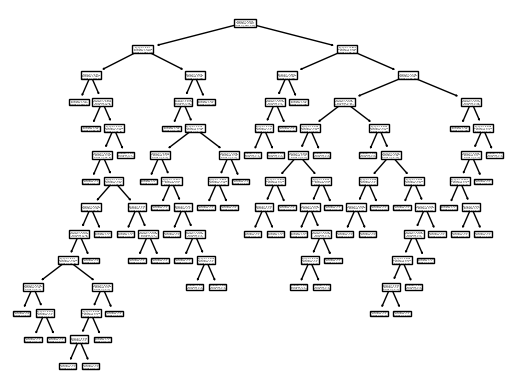

In [21]:
from sklearn import tree
tree.plot_tree(dtc)
plt.show()

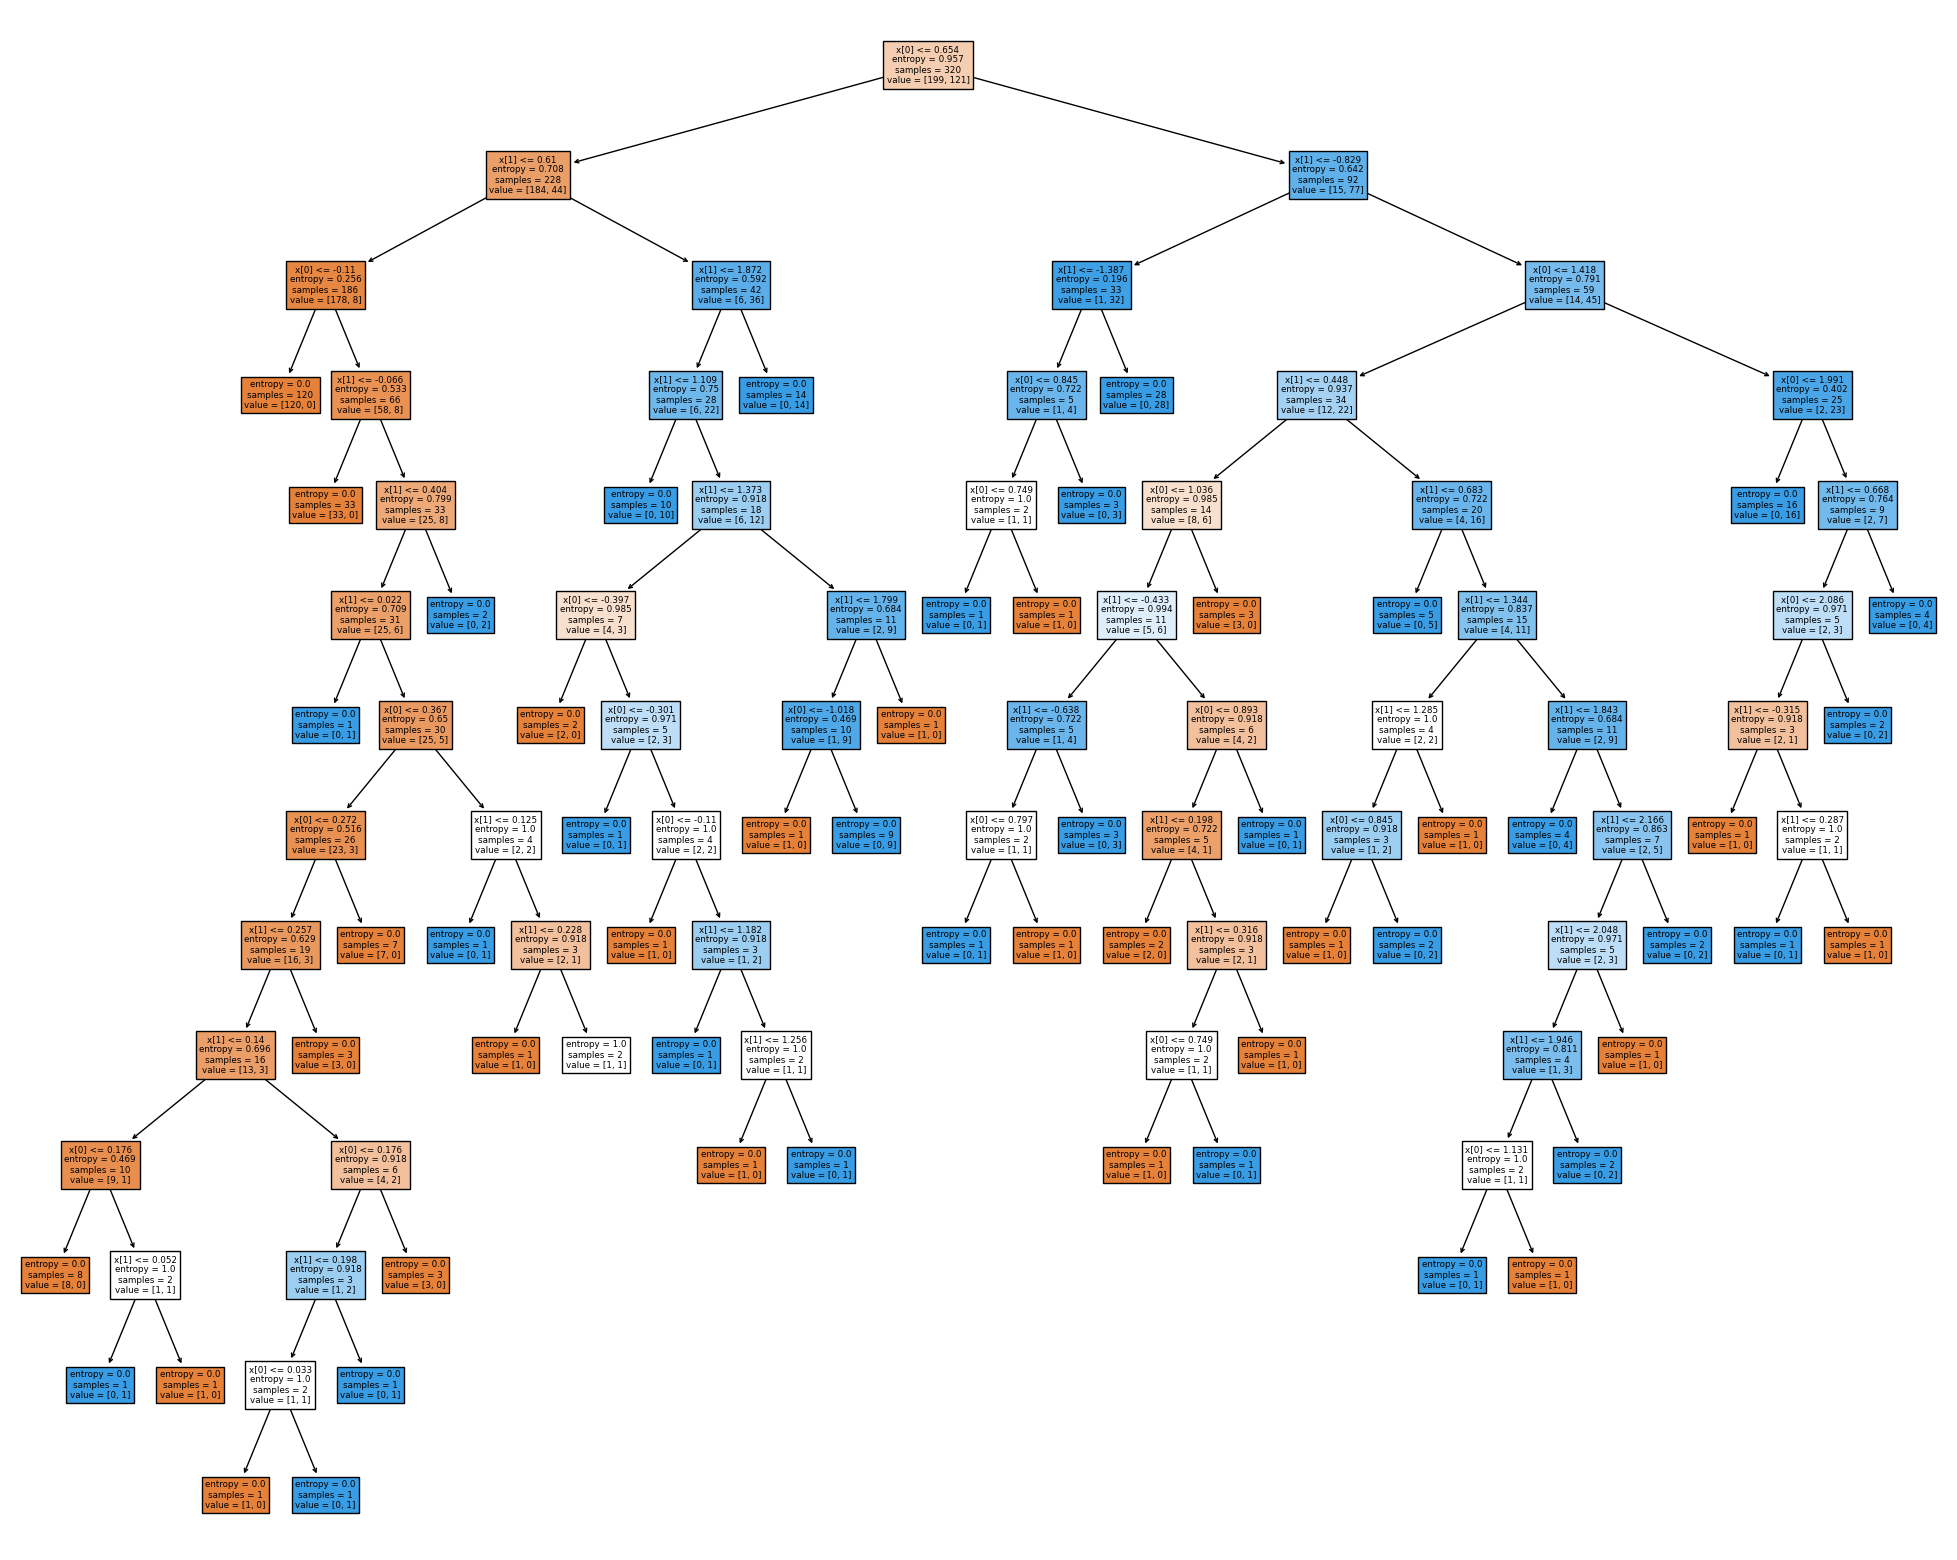

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(dtc, filled=True)
plt.show()

## Ensemble learning
- ensemble methods uses multiple learning algorithms to obtain predictive performnace of an ML problem
1. Bagging methods: bootstrap aggregation
2. Bosting methods

1. Baggind methods:
    - it creates different set of training from the given training data by replacing the few samples with other samples randomly
    - this random sampling with replacement makes each algorithm to have  different predictive power towards a specific class